In [ ]:
# To ignore unimporant system warnings
import warnings
warnings.filterwarnings("ignore")

# We will use Pandas, Numpy, and Matplotlib which is a package for visualization with Python
import pandas as pd
import numpy as np
import geopandas as gpd
from datetime import datetime
from geodatasets import get_path

# Load a required package 
# This is a library for accessing and parsing data through URLs
import urllib.request, json 
import urllib.parse
from urllib.parse import urlencode

# Using folium to create a map
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns # visualization styling package
import branca  # For color gradient
%matplotlib inline 

In [ ]:
# URL for the API endpoint with filters for B41 route and July 4th, 2024
query_url = "https://data.ny.gov/resource/58t6-89vi.json?" \
            "$select=year,month,timestamp,route_id,borough,route_type," \
            "timepoint_stop_id,timepoint_stop_name,timepoint_stop_latitude," \
            "timepoint_stop_longitude,average_road_speed" \
            "&route_id=B41" #\
#            "&timestamp=2024-07-04*"

data = json.loads(urllib.request.urlopen(query_url).read().decode())
data[0]

API = "https://data.ny.gov/resource/58t6-89vi.json?" 

query1 = {'$select': '*',
         '$where': 'route_id="B41" and year = 2024 and month = 11',
         '$limit': 10} # if you don't specify 'limit', it returns 1000 rows as default

df1 = pd.read_csv(API + urlencode(query1))

df1


[{"year":"2024"  month:"11"  timestamp:"2024-11-01T11:00:00.000"  \
NaN  {"year":"2024"  month:"11"  timestamp:"2024-11-01T11:00:00.000"   
NaN  {"year":"2024"  month:"11"  timestamp:"2024-11-01T23:00:00.000"   
NaN  {"year":"2024"  month:"11"  timestamp:"2024-11-01T16:00:00.000"   
NaN  {"year":"2024"  month:"11"  timestamp:"2024-11-01T21:00:00.000"   
NaN  {"year":"2024"  month:"11"  timestamp:"2024-11-01T14:00:00.000"   
NaN  {"year":"2024"  month:"11"  timestamp:"2024-11-01T17:00:00.000"   
NaN  {"year":"2024"  month:"11"  timestamp:"2024-11-01T19:00:00.000"   
NaN  {"year":"2024"  month:"11"  timestamp:"2024-11-01T11:00:00.000"   
NaN  {"year":"2024"  month:"11"  timestamp:"2024-11-01T18:00:00.000"   

     day_of_week:"Tuesday"  hour_of_day:"11"  route_id:"B41"  direction:"S"  \
NaN  day_of_week:"Tuesday"  hour_of_day:"11"  route_id:"B41"  direction:"S"   
NaN  day_of_week:"Tuesday"  hour_of_day:"23"  route_id:"B41"  direction:"S"   
NaN  day_of_week:"Tuesday"  hour_of_day:"16"  route_id:"B41"  direction:"S"   
NaN  day_of_week:"Tuesday"  hour_of_day:"21"  route_id:"B41"  direction:"S"   
NaN  day_of_week:"Tuesday"  hour_of_day:"14"  route_id:"B41"  direction:"S"   
NaN  day_of_week:"Tuesday"  hour_of_day:"17"  route_id:"B41"  direction:"S"   
NaN  day_of_week:"Tuesday"  hour_of_day:"19"  route_id:"B41"  direction:"S"   
NaN  day_of_week:"Tuesday"  hour_of_day:"11"  route_id:"B41"  direction:"S"   
NaN  day_of_week:"Tuesday"  hour_of_day:"18"  route_id:"B41"  direction:"S"   

     borough:"Brooklyn"  route_type:"Limited"  stop_order:"34"  ...  \
NaN  borough:"Brooklyn"    route_type:"Local"  stop_order:"34"  ...   
NaN  borough:"Brooklyn"    route_type:"Local"  stop_order:"34"  ...   
NaN  borough:"Brooklyn"  route_type:"Limited"  stop_order:"34"  ...   
NaN  borough:"Brooklyn"  route_type:"Limited"  stop_order:"34"  ...   
NaN  borough:"Brooklyn"  route_type:"Limited"  stop_order:"34"  ...   
NaN  borough:"Brooklyn"  route_type:"Limited"  stop_order:"34"  ...   
NaN  borough:"Brooklyn"    route_type:"Local"  stop_order:"34"  ...   
NaN  borough:"Brooklyn"  route_type:"Limited"  stop_order:"34"  ...   
NaN  borough:"Brooklyn"  route_type:"Limited"  stop_order:"34"  ...   

     road_distance:"1.1029999999999998"   average_travel_time:"9.511104"  \
NaN  road_distance:"1.1029999999999998"  average_travel_time:"10.216662"   
NaN  road_distance:"1.1029999999999998"   average_travel_time:"7.636110"   
NaN  road_distance:"1.4740000000000002"  average_travel_time:"17.922918"   
NaN  road_distance:"1.4740000000000002"  average_travel_time:"11.239590"   
NaN  road_distance:"1.1029999999999998"  average_travel_time:"13.153566"   
NaN  road_distance:"1.1029999999999998"   average_travel_time:"8.286906"   
NaN  road_distance:"1.1029999999999998"   average_travel_time:"7.344444"   
NaN  road_distance:"1.4740000000000002"  average_travel_time:"13.102380"   
NaN  road_distance:"1.4740000000000002"  average_travel_time:"13.074510"   

     average_road_speed:"6.958182040887992"  bus_trip_count:"12"  \
NaN   average_road_speed:"6.47765331257173"   bus_trip_count:"7"   
NaN  average_road_speed:"8.666716430224287"   bus_trip_count:"6"   
NaN  average_road_speed:"4.934465180468691"   bus_trip_count:"8"   
NaN  average_road_speed:"7.868614424547515"   bus_trip_count:"8"   
NaN  average_road_speed:"5.031334245198857"  bus_trip_count:"14"   
NaN  average_road_speed:"7.986094410923395"  bus_trip_count:"14"   
NaN  average_road_speed:"9.010893132277948"  bus_trip_count:"15"   
NaN  average_road_speed:"6.749918717057513"  bus_trip_count:"14"   
NaN  average_road_speed:"6.764306124129256"  bus_trip_count:"17"   

     timepoint_stop_georeference:{"type":"Point"  coordinates:[-73.933306  \
NaN  timepoint_stop_georeference:{"type":"Point"  coordinates:[-73.933306   
NaN  timepoint_stop_georeference:{"type":"Point"  coordinates:[-73.933306   
NaN  timepoint_stop_georeference:{"type":"Point"  coordinates:[-73.933306   
NaN  timepoint_stop_georeferenc

In [ ]:

def fetch_august_2024_bus_data(route_id="B41", limit=1000):
    """
    Fetches and cleans MTA bus data specifically for August 2024.
    
    Parameters:
    -----------
    route_id : str
        The bus route ID (default: 'B41')
    limit : int
        Number of records to retrieve (default: 1000)
        
    Returns:
    --------
    pandas.DataFrame
        Cleaned and formatted bus data for August 2024
    """
    
    # Define API endpoint and query with specific August 2024 filter
    BASE_API = "https://data.ny.gov/resource/58t6-89vi.json?"
    BUS_API = "https://data.cityofnewyork.us/resource/t4f2-8md7.json?"
    query_speeds = {
        '$select': '*',
        '$where': f'route_id="{route_id}" AND timestamp >= "2024-07-01T00:00:00" AND timestamp < "2024-09-01T00:00:00"',
        '$limit': limit,
        '$order': 'timestamp ASC'  # Order by timestamp
    }
    query_stops = {
        '$select': '*',
        '$limit': limit
    }
    
    # Fetch data
    url_speeds = BASE_API + urlencode(query_speeds)
    url_stops = BUS_API + urlencode(query_stops)
    response_speeds = urllib.request.urlopen(url_speeds)
    response_stops = urllib.request.urlopen(url_stops)
    data_speeds = json.loads(response_speeds.read().decode())
    data_stops = json.loads(response_stops.read().decode())
    
    # Convert to DataFrame
    df_speeds = pd.DataFrame(data_speeds)
    df_stops = pd.DataFrame(data_stops)
    
    # Extract coordinates from georeference columns
    def extract_coordinates(geo_dict):
        if isinstance(geo_dict, dict) and 'coordinates' in geo_dict:
            return pd.Series({
                'longitude': geo_dict['coordinates'][0],
                'latitude': geo_dict['coordinates'][1]
            })
        return pd.Series({'longitude': None, 'latitude': None})
    
    # Extract coordinates for current and next stops using df_speeds instead of df
    coord_cols = df_speeds['timepoint_stop_georeference'].apply(extract_coordinates)
    next_coord_cols = df_speeds['next_timepoint_stop_georeference'].apply(extract_coordinates)
    
    # Add extracted coordinates to DataFrame
    df_speeds['stop_longitude'] = coord_cols['longitude']
    df_speeds['stop_latitude'] = coord_cols['latitude']
    df_speeds['next_stop_longitude'] = next_coord_cols['longitude']
    df_speeds['next_stop_latitude'] = next_coord_cols['latitude']
    
    # Convert timestamp to datetime and create additional time-based columns
    df_speeds['timestamp'] = pd.to_datetime(df_speeds['timestamp'])
    df_speeds['date'] = df_speeds['timestamp'].dt.date
    df_speeds['time'] = df_speeds['timestamp'].dt.time
    df_speeds['hour'] = df_speeds['timestamp'].dt.hour
    df_speeds['day_name'] = df_speeds['timestamp'].dt.day_name()
    
    # Convert numeric columns
    numeric_columns = [
        'hour_of_day', 'stop_order', 'road_distance',
        'average_travel_time', 'average_road_speed', 'bus_trip_count'
    ]
    
    for col in numeric_columns:
        if col in df_speeds.columns:
            df_speeds[col] = pd.to_numeric(df_speeds[col], errors='coerce')
    
    # Select and reorder columns
    columns_order = [
        'date', 'time', 'day_name', 'hour',
        'route_id', 'direction', 'borough', 'route_type',
        'stop_order', 'timepoint_stop_id', 'timepoint_stop_name',
        'stop_latitude', 'stop_longitude',
        'next_stop_latitude', 'next_stop_longitude',
        'road_distance', 'average_travel_time', 'average_road_speed',
        'bus_trip_count'
    ]
    
    # Keep only columns that exist in the DataFrame
    columns_order = [col for col in columns_order if col in df_speeds.columns]
    
    # Return cleaned DataFrame
    df_clean = df_speeds[columns_order].copy()
    
    # Add some basic validations
    print(f"\nData Overview for August 2024:")
    print(f"Total records: {len(df_clean)}")
    print(f"Date range: {df_clean['date'].min()} to {df_clean['date'].max()}")
    print(f"Number of unique stops: {df_clean['timepoint_stop_name'].nunique()}")
    print(f"\nAverage speeds by time of day:")
    print(df_clean.groupby('hour')['average_road_speed'].mean().round(2))
    
    return df_clean

# Example usage
df_august = fetch_august_2024_bus_data(route_id="B41", limit=10000)

# Display sample of the data
print("\nSample of cleaned August 2024 data:")
with pd.option_context('display.max_columns', None, 'display.width', None):
    print(df_august.head())


Data Overview for August 2024:
Total records: 9796
Date range: 2024-07-01 to 2024-08-01
Number of unique stops: 10

Average speeds by time of day:
hour
0      9.28
1     10.14
2     10.45
3     10.33
4      9.68
5      9.39
6      8.68
7      7.81
8      7.22
9      7.05
10     6.84
11     6.65
12     6.33
13     6.21
14     6.24
15     6.21
16     6.20
17     6.34
18     6.79
19     7.24
20     7.44
21     7.50
22     7.95
23     8.45
Name: average_road_speed, dtype: float64

Sample of cleaned August 2024 data:
         date      time day_name  hour route_id direction   borough  \
0  2024-07-01  00:00:00   Monday     0      B41         N  Brooklyn   
1  2024-07-01  00:00:00   Monday     0      B41         S  Brooklyn   
2  2024-07-01  00:00:00   Monday     0      B41         S  Brooklyn   
3  2024-07-01  00:00:00   Monday     0      B41         S  Brooklyn   
4  2024-07-01  00:00:00   Monday     0      B41         N  Brooklyn   

  route_type  stop_order timepoint_stop_id      timepo

In [ ]:
def fetch_bus_data(route_id=None, date_start=None, date_end=None, borough="brooklyn", limit=1000):
    # Define API endpoint and base query
    BASE_API = "https://data.ny.gov/resource/58t6-89vi.json?"
    query_speeds = {
        '$select': 'route_id, AVG(average_road_speed) as avg_speed',
        '$group': 'route_id',
        '$limit': limit,
        '$order': 'avg_speed'
    }
    
    # Build WHERE clause based on filters
    where_conditions = []
    
    if route_id:
        where_conditions.append(f'route_id="{route_id}"')
    if borough:
        where_conditions.append(f'borough="{borough}"')
    if date_start:
        where_conditions.append(f'timestamp>="{date_start}T00:00:00"')
    if date_end:
        where_conditions.append(f'timestamp<="{date_end}T23:59:59"')
    
    if where_conditions:
        query_speeds['$where'] = ' AND '.join(where_conditions)
    
    # Fetch data
    url_speeds = BASE_API + urlencode(query_speeds)
    response_speeds = urllib.request.urlopen(url_speeds)
    data_speeds = json.loads(response_speeds.read().decode())
    
    # Convert to DataFrame
    df_speeds = pd.DataFrame(data_speeds)
    return df_speeds



Bus Stop Analysis:
            timepoint_stop_name  bus_trip_count  stop_latitude  \
8          FLATBUSH AV/OCEAN AV           23.20      40.662643   
0  CADMAN PLAZA WEST/JOHNSON ST           21.84      40.695535   
7       FLATBUSH AV/NOSTRAND AV           16.47      40.632805   
4         FLATBUSH AV/CHURCH AV           16.38      40.649697   
2       FLATBUSH AV/ATLANTIC AV           15.30      40.684187   
5       FLATBUSH AV/EMPIRE BLVD           12.74      40.663012   
9           FLATBUSH AV/TROY AV           11.95      40.619715   
3          FLATBUSH AV/AVENUE P           11.52      40.619195   
1           E 70 ST/VETERANS AV            9.13      40.619916   
6       FLATBUSH AV/KINGS PLAZA            8.03      40.609251   

   stop_longitude  average_road_speed  
8      -73.962143                6.90  
0      -73.990829                5.78  
7      -73.947493                7.79  
4      -73.958641                7.03  
2      -73.977626                7.42  
5      -73.96

In [ ]:
# Define API endpoint and query with specific August 2024 filter
BASE_API = "https://data.ny.gov/resource/58t6-89vi.json?"
BUS_API = "https://data.cityofnewyork.us/resource/t4f2-8md7.json?"
borough_api = "https://data.cityofnewyork.us/resource/7t3b-ywvw.json?"
query_speeds = {
    '$select': '*',
    '$where': f'route_id="{"B41"}" AND timestamp >= "2024-07-01T00:00:00" AND timestamp < "2024-09-01T00:00:00"',
    '$limit': 10000,
    '$order': 'timestamp ASC'  # Order by timestamp
}
query_stops = {
    '$select': '*',
    '$limit': 10000
}

# Fetch data
url_speeds = BASE_API + urlencode(query_speeds)
url_stops = BUS_API + urlencode(query_stops)
url_boroughs = borough_api 

response_speeds = urllib.request.urlopen(url_speeds)
response_stops = urllib.request.urlopen(url_stops)
response_borough = urllib.request.urlopen(url_boroughs)

data_speeds = json.loads(response_speeds.read().decode())
data_stops = json.loads(response_stops.read().decode())
data_borough = json.loads(response_borough.read().decode())

# Convert to DataFrame
df_speeds = pd.DataFrame(data_speeds)
df_stops = pd.DataFrame(data_stops)
df_borough = pd.DataFrame(data_borough)

In [17]:
df_speeds.columns

Index(['year', 'month', 'timestamp', 'day_of_week', 'hour_of_day', 'route_id',
       'direction', 'borough', 'route_type', 'stop_order', 'timepoint_stop_id',
       'timepoint_stop_name', 'timepoint_stop_latitude',
       'timepoint_stop_longitude', 'next_timepoint_stop_id',
       'next_timepoint_stop_name', 'next_timepoint_stop_latitude',
       'next_timepoint_stop_longitude', 'road_distance', 'average_travel_time',
       'average_road_speed', 'bus_trip_count', 'timepoint_stop_georeference',
       'next_timepoint_stop_georeference'],
      dtype='object')

In [18]:
query3 = {'$select': 'route_id, route_type, avg(average_road_speed) as avg_speed',
         '$where': 'timestamp >= "2020-01-01" and timestamp < "2024-09-01"', 
         '$group': 'route_id, route_type',
         '$order': 'avg_speed DESC',
         '$limit': 25} 

# Using pd.read_json instead of pd.read_csv
df3 = pd.read_json(BASE_API + urlencode(query3))

# Convert avg_speed to numeric and sort
df3['avg_speed'] = pd.to_numeric(df3['avg_speed'])
df3 = df3.sort_values('avg_speed', ascending=False).reset_index(drop=True)

# Display clean dataframe
print(df3)

   route_id route_type  avg_speed
0       Q35      Local  18.784590
1      SIM2    Express  18.263728
2     SIM26    Express  16.827396
3      SIM9    Express  16.604951
4      SIM5    Express  16.444201
5       S90    Limited  16.309983
6     SIM4X    Express  16.118032
7       S89    Limited  16.101298
8     SIM25    Express  15.830159
9       Q50    Limited  15.714923
10      S40      Local  15.443098
11     SIM7    Express  15.373426
12    SIM23    Express  15.368403
13     SIM6    Express  15.297130
14     BX29      Local  15.151623
15     QM16    Express  14.886170
16     S79+        SBS  14.825374
17    SIM15    Express  14.672547
18    SIM32    Express  14.649886
19    SIM22    Express  14.641289
20      S55      Local  14.588278
21    SIM8X    Express  14.451567
22    SIM35    Express  14.382665
23     SIM8    Express  14.297795
24    SIM33    Express  14.216441


In [19]:
df_stops

the_geom boro_code  \
0     {'type': 'Point', 'coordinates': [-73.94874357...         3   
1     {'type': 'Point', 'coordinates': [-74.02283555...         3   
2     {'type': 'Point', 'coordinates': [-73.92467258...         3   
3     {'type': 'Point', 'coordinates': [-73.94013458...         3   
4     {'type': 'Point', 'coordinates': [-73.93991658...         3   
...                                                 ...       ...   
3325  {'type': 'Point', 'coordinates': [-74.11221352...         5   
3326  {'type': 'Point', 'coordinates': [-74.16856250...         5   
3327  {'type': 'Point', 'coordinates': [-74.09298952...         5   
3328  {'type': 'Point', 'coordinates': [-74.12038852...         5   
3329  {'type': 'Point', 'coordinates': [-74.11976852...         5   

          boro_name boro_cd coun_dist assem_dist st_sen_dist cong_dist  \
0          Brooklyn     317        45         42          21         9   
1          Brooklyn     310        43         46          26        11   
2          Brooklyn     308        41         55          20         9   
3          Brooklyn     315        48         45          23         8   
4          Brooklyn     315        48         45          23         8   
...             ...     ...       ...        ...         ...       ...   
3325  Staten Island     502        50         64          24        11   
3326  Staten Island     502        51         63          24        11   
3327  Staten Island     501        49         61          23        11   
3328  Staten Island     503        50         64          24        11   
3329  Staten Island     503        50         64          24        11   

     shelter_id corner         on_street      cross_stre   longitude  \
0       BR02218     SW              AV D     NOSTRAND AV  -73.948745   
1       BR02219     SW              5 AV  BAY RIDGE PKWY  -74.022837   
2       BR02220     SE       ST MARKS AV      BUFFALO AV  -73.924674   
3       BR02221     SW     ORIENTAL BLVD    MACKENZIE ST  -73.940136   
4       BR02222     SW     ORIENTAL BLVD    MACKENZIE ST  -73.939918   
...         ...    ...               ...             ...         ...   
3325    SI05219     NE        Hylan Blvd        Beach Av  -74.112215   
3326    SI05220     NW   Independence Av        Pathmark  -74.168564   
3327    SI05221     SW  Richmond Terrace     Franklin Av  -74.092991   
3328    SI05222     SW        HYLAN BLVD        GUYON AV   -74.12039   
3329    SI05223     NE        HYLAN BLVD        GUYON AV   -74.11977   

       latitude                                         ntaname femafldz  \
0     40.640863                           East Flatbush-Erasmus        X   
1     40.629253                                       Bay Ridge        X   
2     40.673767                           Crown Heights (North)        X   
3     40.578042  Sheepshead Bay-Manhattan Beach-Gerritsen Beach        X   
4     40.578065  Sheepshead Bay-Manhattan Beach-Gerritsen Beach        X   
...         ...                                             ...      ...   
3325  40.567828                          New Dorp-Midland Beach        X   
3326   40.57401   New Springville-Willowbrook-Bulls Head-Travis        X   
3327  40.645357                         St. George-New Brighton        X   
3328    40.5603                            Oakwood-Richmondtown        X   
3329   40.56044                            Oakwood-Richmondtown        X   

                               femafld_t hrc_evac  
0           AREA OF MINIMAL FLOOD HAZARD        5  
1           AREA OF MINIMAL FLOOD HAZARD      NaN  
2           AREA OF MINIMAL FLOOD HAZARD      NaN  
3           AREA OF MINIMAL FLOOD HAZARD        1  
4           AREA OF MINIMAL FLOOD HAZARD        1  
...                                  ...      ...  
3325        AREA OF MINIMAL FLOOD HAZARD        4  
3326        AREA OF MINIMAL FLOOD HAZARD        3  
3327        AREA OF MINIMAL FLOOD HAZARD      NaN  
3328  0.2 PCT ANNUAL CHANCE FLO

In [ ]:
path_to_data = get_path("nybb")
gdf = gpd.read_file(path_to_data).to_crs("EPSG:4326")
gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

In [23]:
g_stops = gpd.GeoDataFrame(
    df_stops, geometry=gpd.points_from_xy(df_stops.longitude, df_stops.latitude), crs="EPSG:4326"
)
g_stops

the_geom boro_code  \
0     {'type': 'Point', 'coordinates': [-73.94874357...         3   
1     {'type': 'Point', 'coordinates': [-74.02283555...         3   
2     {'type': 'Point', 'coordinates': [-73.92467258...         3   
3     {'type': 'Point', 'coordinates': [-73.94013458...         3   
4     {'type': 'Point', 'coordinates': [-73.93991658...         3   
...                                                 ...       ...   
3325  {'type': 'Point', 'coordinates': [-74.11221352...         5   
3326  {'type': 'Point', 'coordinates': [-74.16856250...         5   
3327  {'type': 'Point', 'coordinates': [-74.09298952...         5   
3328  {'type': 'Point', 'coordinates': [-74.12038852...         5   
3329  {'type': 'Point', 'coordinates': [-74.11976852...         5   

          boro_name boro_cd coun_dist assem_dist st_sen_dist cong_dist  \
0          Brooklyn     317        45         42          21         9   
1          Brooklyn     310        43         46          26        11   
2          Brooklyn     308        41         55          20         9   
3          Brooklyn     315        48         45          23         8   
4          Brooklyn     315        48         45          23         8   
...             ...     ...       ...        ...         ...       ...   
3325  Staten Island     502        50         64          24        11   
3326  Staten Island     502        51         63          24        11   
3327  Staten Island     501        49         61          23        11   
3328  Staten Island     503        50         64          24        11   
3329  Staten Island     503        50         64          24        11   

     shelter_id corner         on_street      cross_stre   longitude  \
0       BR02218     SW              AV D     NOSTRAND AV  -73.948745   
1       BR02219     SW              5 AV  BAY RIDGE PKWY  -74.022837   
2       BR02220     SE       ST MARKS AV      BUFFALO AV  -73.924674   
3       BR02221     SW     ORIENTAL BLVD    MACKENZIE ST  -73.940136   
4       BR02222     SW     ORIENTAL BLVD    MACKENZIE ST  -73.939918   
...         ...    ...               ...             ...         ...   
3325    SI05219     NE        Hylan Blvd        Beach Av  -74.112215   
3326    SI05220     NW   Independence Av        Pathmark  -74.168564   
3327    SI05221     SW  Richmond Terrace     Franklin Av  -74.092991   
3328    SI05222     SW        HYLAN BLVD        GUYON AV   -74.12039   
3329    SI05223     NE        HYLAN BLVD        GUYON AV   -74.11977   

       latitude                                         ntaname femafldz  \
0     40.640863                           East Flatbush-Erasmus        X   
1     40.629253                                       Bay Ridge        X   
2     40.673767                           Crown Heights (North)        X   
3     40.578042  Sheepshead Bay-Manhattan Beach-Gerritsen Beach        X   
4     40.578065  Sheepshead Bay-Manhattan Beach-Gerritsen Beach        X   
...         ...                                             ...      ...   
3325  40.567828                          New Dorp-Midland Beach        X   
3326   40.57401   New Springville-Willowbrook-Bulls Head-Travis        X   
3327  40.645357                         St. George-New Brighton        X   
3328    40.5603                            Oakwood-Richmondtown        X   
3329   40.56044                            Oakwood-Richmondtown        X   

                               femafld_t hrc_evac                    geometry  
0           AREA OF MINIMAL FLOOD HAZARD        5  POINT (-73.94874 40.64086)  
1           AREA OF MINIMAL FLOOD HAZARD      NaN  POINT (-74.02284 40.62925)  
2           AREA OF MINIMAL FLOOD HAZARD      NaN  POINT (-73.92467 40.67377)  
3           AREA OF MINIMAL FLOOD HAZARD        1  POINT (-73.94014 40.57804)  
4           AREA OF MINIMAL FLOOD HAZARD        1  POINT (-73.93992 40.57806)  
...                                  ...      ...                      

<Axes: >

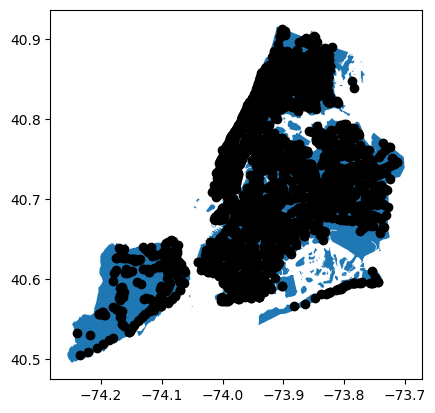

In [24]:
ax = gdf["geometry"].plot()
g_stops["geometry"].plot(ax=ax, color = "black")

In [ ]:
g_stops.explore(
    "shelter_id",
    tiles='cartodbdark_matter',  # Dark mode tiles
    tooltip=["shelter_id", "cross_stre", "ntaname"]
)